In [1]:
import pandas as pd
import pubchempy as pcp
import os
from vina import Vina

In [3]:
rec_lig_df = pd.read_csv("IUPHAR/interactions.csv", skiprows=[0])
rec_lig_df = rec_lig_df[['Target', 'Target ID', 'Ligand', 'Ligand ID']].drop_duplicates().dropna()
rec_lig_df

/tmp/ipykernel_3296919/1604033830.py:1: DtypeWarning: Columns (6,8,9,10,11,39) have mixed types. Specify dtype option on import or set low_memory=False.
  rec_lig_df = pd.read_csv("IUPHAR/interactions.csv", skiprows=[0])


,Target,Target ID,Ligand,Ligand ID
0,12S-LOX,1387.0,ML355,8752
1,15-LOX-1,1388.0,PKUMDL_MH_1001,9141
2,15-LOX-1,1388.0,compound 34 [PMID: 20866075],8751
3,15-LOX-1,1388.0,ML351,10263
4,15-LOX-1,1388.0,PD-146176,11390
...,...,...,...,...
22611,zeta chain of T cell receptor associated prote...,2285.0,aloisine,5923
22612,zeta chain of T cell receptor associated prote...,2285.0,mivavotinib,9600
22613,zeta chain of T cell receptor associated prote...,2285.0,Syk inhibitor II,6047
22614,Zika virus genome polyprotein,2953.0,NSC157058,9652


In [34]:
TRPV1_lig_df = rec_lig_df[rec_lig_df['Target ID']==507.0].drop_duplicates()
TRPV1_lig_df

,Target,Target ID,Ligand,Ligand ID
21609,TRPV1,507.0,anandamide,2364
21610,TRPV1,507.0,DkTx,4178
21611,TRPV1,507.0,RhTx,12544
21612,TRPV1,507.0,[<sup>3</sup>H]resiniferatoxin,4091
21613,TRPV1,507.0,zucapsaicin,11576
21614,TRPV1,507.0,12S-HPETE,2481
21615,TRPV1,507.0,2-APB,2433
21616,TRPV1,507.0,5S-HPETE,2483
21617,TRPV1,507.0,allicin,2419
21620,TRPV1,507.0,arvanil,2485


In [4]:
def contains_invalid_chars(smiles):
    invalid_chars = ['(', ')', '<', '>']
    return any(char in smiles for char in invalid_chars)

TRPV_ligands = rec_lig_df[rec_lig_df['Target ID']==507.0].drop_duplicates()
TRPV_ligands = TRPV_ligands[~TRPV_ligands['Ligand'].apply(contains_invalid_chars)]
TRPV_ligands = TRPV_ligands['Ligand'].tolist()
len(TRPV_ligands)

44

In [4]:
#name2pdb 전체 적용
import utils

os.makedirs(os.path.join(os.getcwd(), 'IUPAHR_dock'), exist_ok= True)
for lig in TRPV_ligands['Ligand'].tolist():
    utils.name2pdb(lig, os.path.join(os.getcwd(), 'IUPAHR_dock'))

Converted anandamide to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/anandamide.pdb
Not found: DkTx (404 error)
Not found: RhTx (404 error)
Converted zucapsaicin to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/zucapsaicin.pdb
Converted 12S-HPETE to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/12S-HPETE.pdb
Converted 2-APB to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/2-APB.pdb
Converted 5S-HPETE to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/5S-HPETE.pdb
Converted allicin to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/allicin.pdb
Converted arvanil to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/arvanil.pdb
Converted capsaicin to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/capsaicin.pdb
Converted olvanil to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/olvanil.pdb
Converted piperine to /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPAHR_dock/piperine.pdb
Converted PPAHV to /ho

In [51]:
import subprocess
    
receptor = "receptor/apo_8gfa.pdbqt"
ligands = TRPV_ligands

def run_dock(receptor, ligand):
    try:
        logging.info(f"Processing ligand: {ligand}")
        subprocess.run(["python3", "./dock.py", "-r", receptor, "-l", ligand, "-o", "IUPHAR/dockpy_res_apo"], check=True)
        logging.info(f"Completed ligand: {ligand}")
    except subprocess.CalledProcessError as e:
        logging.error(f"Error processing ligand: {ligand}, Error: {e}")

for lig in ligands:
    run_dock(receptor, lig)

#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the scoring function ... done.
Analyzing the binding site ... done.
Using random seed: -9

ERROR:root:Error processing ligand: DkTx, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'DkTx', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: DkTx (404 error)
Error: Converting DkTx pdb file failed, quitting dock


ERROR:root:Error processing ligand: RhTx, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'RhTx', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: RhTx (404 error)
Error: Converting RhTx pdb file failed, quitting dock
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the sco

ERROR:root:Error processing ligand: vanillotoxin-1, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'vanillotoxin-1', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: vanillotoxin-1 (404 error)
Error: Converting vanillotoxin-1 pdb file failed, quitting dock


ERROR:root:Error processing ligand: vanillotoxin-2, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'vanillotoxin-2', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: vanillotoxin-2 (404 error)
Error: Converting vanillotoxin-2 pdb file failed, quitting dock


ERROR:root:Error processing ligand: vanillotoxin-3, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'vanillotoxin-3', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: vanillotoxin-3 (404 error)
Error: Converting vanillotoxin-3 pdb file failed, quitting dock
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done

ERROR:root:Error processing ligand: diphenylboronic anhydride, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'diphenylboronic anhydride', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: diphenylboronic_anhydride (404 error)
Error: Converting diphenylboronic_anhydride pdb file failed, quitting dock
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs


ERROR:root:Error processing ligand: s-RhTx, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 's-RhTx', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: s-RhTx (404 error)
Error: Converting s-RhTx pdb file failed, quitting dock
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.
Setting up the

ERROR:root:Error processing ligand: ruthenium red, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'ruthenium red', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: ruthenium_red (404 error)
Error: Converting ruthenium_red pdb file failed, quitting dock
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... done.


ERROR:root:Error processing ligand: agatoxin 489, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'agatoxin 489', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: agatoxin_489 (404 error)
Error: Converting agatoxin_489 pdb file failed, quitting dock


ERROR:root:Error processing ligand: AMG 9810, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', 'AMG 9810', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: AMG_9810 (404 error)
Error: Converting AMG_9810 pdb file failed, quitting dock
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPUs
Reading input ... Converted 5'-iod

ERROR:root:Error processing ligand: 6-iodo-nordihydrocapsaicin, Error: Command '['python3', './dock.py', '-r', 'receptor/apo_8gfa.pdbqt', '-l', '6-iodo-nordihydrocapsaicin', '-o', 'IUPHAR/dockpy_res_apo']' returned non-zero exit status 1.


Not found: 6-iodo-nordihydrocapsaicin (404 error)
Error: Converting 6-iodo-nordihydrocapsaicin pdb file failed, quitting dock
#################################################################
# If you used AutoDock Vina in your work, please cite:          #
#                                                               #
# O. Trott, A. J. Olson,                                        #
# AutoDock Vina: improving the speed and accuracy of docking    #
# with a new scoring function, efficient optimization and       #
# multithreading, Journal of Computational Chemistry 31 (2010)  #
# 455-461                                                       #
#                                                               #
# DOI 10.1002/jcc.21334                                         #
#                                                               #
# Please see http://vina.scripps.edu for more information.      #
#################################################################

Detected 16 CPU

In [10]:
import os
import pandas as pd

def parse_log_file(log_file):
    """Parse the log file to extract the compound name and affinity value."""
    with open(log_file, 'r') as file:
        lines = file.readlines()
    
    compound_name = os.path.basename(log_file).replace('r_docked_', '').replace('.log', '')
    affinity = None
    
    for line in lines:
        if line.strip().startswith('1'):
            parts = line.split()
            if len(parts) > 1:
                try:
                    affinity = float(parts[1])
                except ValueError:
                    continue
            break
    
    return compound_name, affinity

def process_log_files(log_dir):
    """Process all log files in the specified directory and return a DataFrame."""
    data = []

    for root, dirs, files in os.walk(log_dir):
        for log_file in files:
            if log_file.endswith('.log'):
                log_path = os.path.join(root, log_file)
                compound_name, affinity = parse_log_file(log_path)
                if affinity is not None:
                    data.append((compound_name, affinity))
    
    df = pd.DataFrame(data, columns=['INCI', 'Affinity'])
    return df

log_dir = './IUPHAR/dockpy_res/'
df = process_log_files(log_dir)
df

,INCI,Affinity
0,allicin,-4.6
1,BCTC,-7.8
2,SB705498,-9.0
3,MRS-1477,-6.0
4,camphor,-6.3
5,JNJ17203212,-9.7
6,capsazepine,-8.9
7,SB366791,-9.6
8,resiniferatoxin,-10.9
9,AMG517,-9.3


In [9]:
log_dir = './IUPHAR/dockpy_res_o'

# 로그 파일들을 처리하여 데이터프레임 생성
df_o = process_log_files(log_dir)
df_o

,INCI,Affinity
0,allicin,-4.5
1,BCTC,-7.6
2,SB705498,-9.1
3,MRS-1477,-6.0
4,camphor,-6.3
5,JNJ17203212,-9.6
6,capsazepine,-8.4
7,SB366791,-9.6
8,resiniferatoxin,-10.5
9,AMG517,-9.3


In [52]:
log_dir = './IUPHAR/dockpy_res_apo/'

# 로그 파일들을 처리하여 데이터프레임 생성
df_r = process_log_files(log_dir)
df_r

,INCI,Affinity
0,allicin,-4.7
1,BCTC,-8.5
2,SB705498,-10.1
3,MRS-1477,-6.3
4,camphor,-5.7
5,JNJ17203212,-9.8
6,capsazepine,-9.0
7,SB366791,-9.7
8,resiniferatoxin,-10.6
9,AMG517,-10.5


In [20]:
df_comb = pd.concat([df_o, df], axis=1)
df_comb.columns = ['INCI', 'R_Affinity', 'temp', 'Cap_mode_Affinity']
df_comb = df_comb.drop(labels='temp', axis=1)
df_comb['Diff'] = df_comb["Cap_mode_Affinity"] - df_comb['R_Affinity']
df_comb

,INCI,R_Affinity,Cap_mode_Affinity,Diff
0,allicin,-4.5,-4.6,-0.1
1,BCTC,-7.6,-7.8,-0.2
2,SB705498,-9.1,-9.0,0.1
3,MRS-1477,-6.0,-6.0,0.0
4,camphor,-6.3,-6.3,0.0
5,JNJ17203212,-9.6,-9.7,-0.1
6,capsazepine,-8.4,-8.9,-0.5
7,SB366791,-9.6,-9.6,0.0
8,resiniferatoxin,-10.5,-10.9,-0.4
9,AMG517,-9.3,-9.3,0.0


In [36]:
import requests
from bs4 import BeautifulSoup

def get_biological_activity(ligand_id):
    url = f"https://www.guidetopharmacology.org/GRAC/LigandDisplayForward?tab=biology&ligandId={ligand_id}"
    response = requests.get(url)
    
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Navigating through the HTML structure
        container = soup.find('div', class_='container_16')
        if container:
            #print("Found container")
            grid_12 = container.find('div', class_='grid_12')
            if grid_12:
                #print("Found grid_12")
                grid_16_alpha_all = grid_12.find_all('div', class_='grid_16 alpha')
                if len(grid_16_alpha_all) >= 2:
                    #print("Found grid_16 alpha")
                    content_box = grid_16_alpha_all[1].find('div', class_='contentboxfullhelp')
                    if content_box:
                        #print("Found contentboxfullhelp")
                        data_tables_container = content_box.find('div', class_='data_tables_container')
                        if data_tables_container:
                            #print("Found data_tables_container")
                            receptor_data_table = data_tables_container.find('table', class_='receptor_data_tables')
                            if receptor_data_table:
                                #print("Found receptor_data_tables")
                                rows = receptor_data_table.find_all('tr')
                                activities = []
                                for row in rows:
                                    cells = row.find_all('td')
                                    row_data = [cell.get_text(strip=True) for cell in cells]
                                    activities.append(row_data)
                                return activities
                            else:
                                print("receptor_data_tables not found")
                        else:
                            print("data_tables_container not found")
                    else:
                        print("contentboxfullhelp not found")
                else:
                    print("Not enough grid_16 alpha found")
            else:
                print("grid_12 not found")
        else:
            print("container not found")
        return [f"No biological activity found for ligand ID: {ligand_id}"]
    else:
        print(f"Failed to retrieve data for ligand ID: {ligand_id}. Status code: {response.status_code}")
        return [f"Failed to retrieve data for ligand ID: {ligand_id}. Status code: {response.status_code}"]

# Example usage
ligand_ids = TRPV1_lig_df[['Ligand', 'Ligand ID']]  # Replace with your ligand IDs
for idx, row in ligand_ids.iterrows(): 
    print(f"Biological activity for ligand ID: {row['Ligand ID']}")
    activities = get_biological_activity(row['Ligand ID'])
    print("#####################################################################################")
    print(row['Ligand'])
    for activity in activities:
        print(activity)
    print("#####################################################################################")

Biological activity for ligand ID: 2364
#####################################################################################
anandamide
['Natural/Endogenous Targets']
['TargetCB1receptorCB2receptorGPR55', 'CB1receptor', 'CB2receptor', 'GPR55']
[]
['CB1receptor']
['CB2receptor']
['GPR55']
#####################################################################################
Biological activity for ligand ID: 4178
#####################################################################################
DkTx
['Selectivity at ion channels']
['Key to terms and symbols', '', 'Click column headers to sort']
['TargetSp.TypeActionValueParameterConcentration range (M)ReferenceTRPV1RnActivatorActivation6.6pEC50-1⤷pEC506.6\n                                                                                                (EC502.3x10-10M)\n                                                                                                \n                                                                      

In [13]:
TRPV1_ago_anta = pd.read_csv('TRPV1_ago_anta.csv')
TRPV1_ago_anta = TRPV1_ago_anta.drop('Unnamed: 0', axis=1)
TRPV1_ago_anta = TRPV1_ago_anta.sort_values(by='Bind_mode')
TRPV1_ago_anta

,INCI,R_Affinity,Cap_mode_Affinity,Diff,Bind_mode
25,NADA,-8.0,-8.3,-0.3,-1
19,asivatrep,-8.7,-8.6,0.1,-1
18,A-1165442,-8.3,-8.2,0.1,-1
16,mavatrep,-10.7,-10.7,0.0,-1
29,AZD1386,-8.8,-8.8,0.0,-1
13,SB452533,-8.4,-8.5,-0.1,-1
11,A778317,-9.1,-9.0,0.1,-1
20,AMG628,-9.7,-9.2,0.5,-1
9,AMG517,-9.3,-9.3,0.0,-1
21,JYL1421,-8.1,-8.1,0.0,-1


In [63]:
TRPV1_ago_anta

,INCI,R_Affinity,Cap_mode_Affinity,Diff,Bind_mode,INCI,Affinity,Apo-Cap,Avg_Cap_aff,Cap-Apo
25,NADA,-8.0,-8.3,-0.3,-1,NADA,-8.7,-0.55,-8.15,0.55
19,asivatrep,-8.7,-8.6,0.1,-1,asivatrep,-10.5,-1.85,-8.65,1.85
18,A-1165442,-8.3,-8.2,0.1,-1,A-1165442,-8.2,0.05,-8.25,-0.05
16,mavatrep,-10.7,-10.7,0.0,-1,mavatrep,-10.8,-0.10,-10.70,0.10
29,AZD1386,-8.8,-8.8,0.0,-1,AZD1386,-8.8,0.00,-8.80,0.00
13,SB452533,-8.4,-8.5,-0.1,-1,SB452533,-8.5,-0.05,-8.45,0.05
11,A778317,-9.1,-9.0,0.1,-1,A778317,-11.4,-2.35,-9.05,2.35
20,AMG628,-9.7,-9.2,0.5,-1,AMG628,-9.4,0.05,-9.45,-0.05
9,AMG517,-9.3,-9.3,0.0,-1,AMG517,-10.5,-1.20,-9.30,1.20
21,JYL1421,-8.1,-8.1,0.0,-1,JYL1421,-9.3,-1.20,-8.10,1.20


In [64]:
TRPV1_ago_anta['Avg_Cap_aff'] = TRPV1_ago_anta[['R_Affinity', 'Cap_mode_Affinity']].mean(axis=1)
TRPV1_ago_anta['Cap-Apo'] = TRPV1_ago_anta['Avg_Cap_aff'] - TRPV1_ago_anta['Affinity'] 
TRPV1_ago_anta_8 = TRPV1_ago_anta[TRPV1_ago_anta['Affinity']<=-7]
TRPV1_ago_anta_8

,INCI,R_Affinity,Cap_mode_Affinity,Diff,Bind_mode,INCI,Affinity,Apo-Cap,Avg_Cap_aff,Cap-Apo
25,NADA,-8.0,-8.3,-0.3,-1,NADA,-8.7,-0.55,-8.15,0.55
19,asivatrep,-8.7,-8.6,0.1,-1,asivatrep,-10.5,-1.85,-8.65,1.85
18,A-1165442,-8.3,-8.2,0.1,-1,A-1165442,-8.2,0.05,-8.25,-0.05
16,mavatrep,-10.7,-10.7,0.0,-1,mavatrep,-10.8,-0.10,-10.70,0.10
29,AZD1386,-8.8,-8.8,0.0,-1,AZD1386,-8.8,0.00,-8.80,0.00
13,SB452533,-8.4,-8.5,-0.1,-1,SB452533,-8.5,-0.05,-8.45,0.05
11,A778317,-9.1,-9.0,0.1,-1,A778317,-11.4,-2.35,-9.05,2.35
20,AMG628,-9.7,-9.2,0.5,-1,AMG628,-9.4,0.05,-9.45,-0.05
9,AMG517,-9.3,-9.3,0.0,-1,AMG517,-10.5,-1.20,-9.30,1.20
21,JYL1421,-8.1,-8.1,0.0,-1,JYL1421,-9.3,-1.20,-8.10,1.20


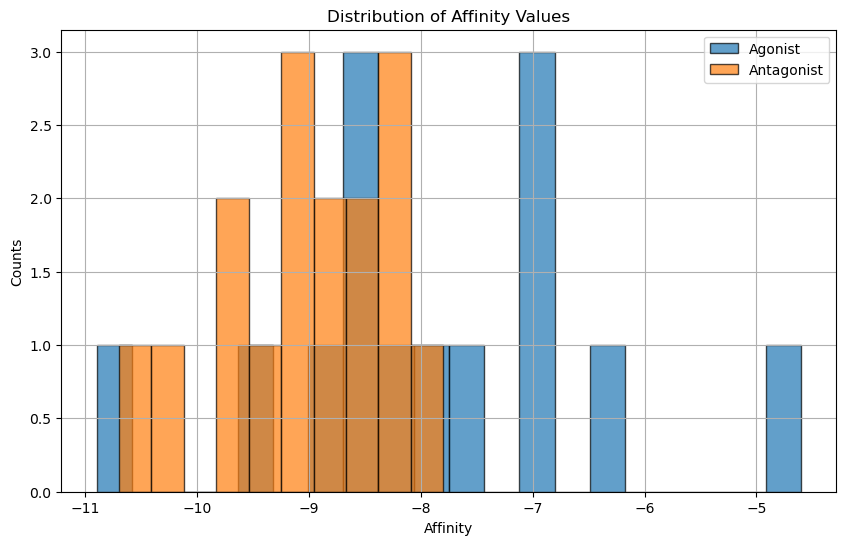

In [121]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(TRPV1_ago_anta[TRPV1_ago_anta['Bind_mode']=='1']['Cap_mode_Affinity'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(TRPV1_ago_anta[TRPV1_ago_anta['Bind_mode']=='-1']['Cap_mode_Affinity'], bins=10, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


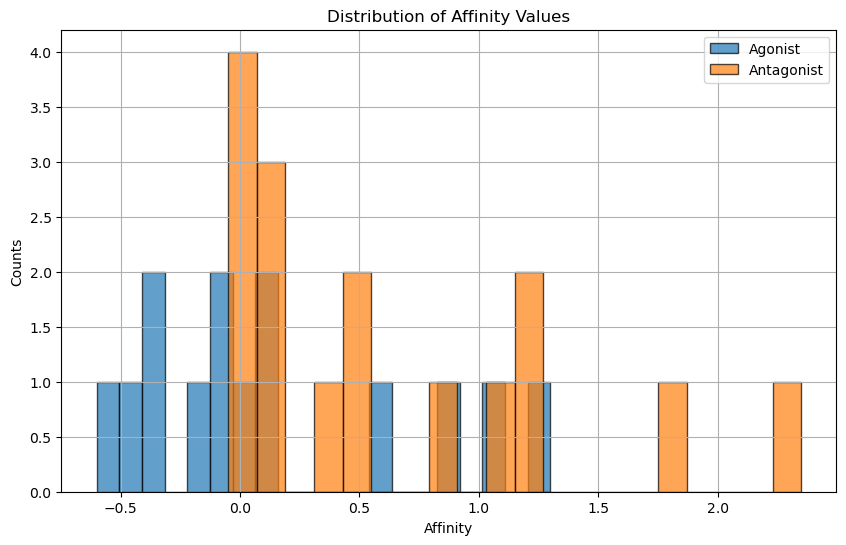

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(TRPV1_ago_anta[TRPV1_ago_anta['Bind_mode']=='1']['Cap-Apo'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(TRPV1_ago_anta[TRPV1_ago_anta['Bind_mode']=='-1']['Cap-Apo'], bins=20, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


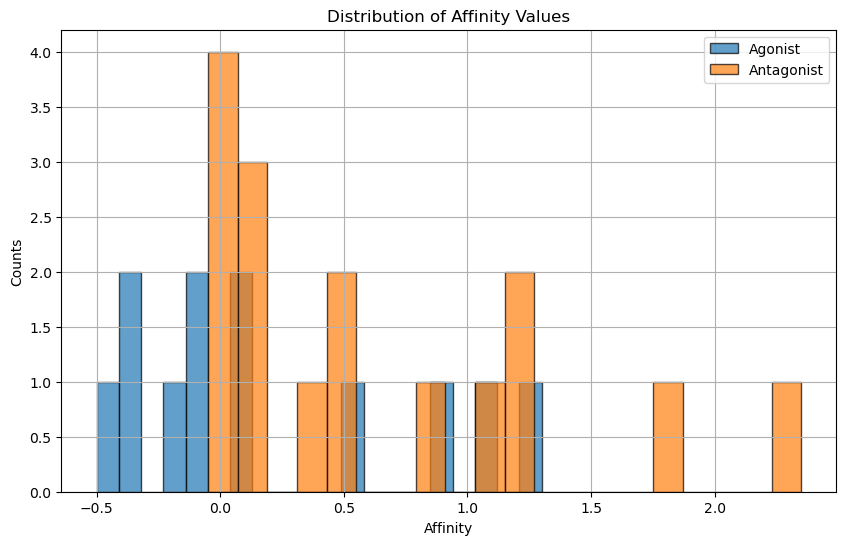

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(TRPV1_ago_anta_8[TRPV1_ago_anta_8['Bind_mode']=='1']['Cap-Apo'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(TRPV1_ago_anta_8[TRPV1_ago_anta_8['Bind_mode']=='-1']['Cap-Apo'], bins=20, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


In [71]:
import os
import dock

lig_dir = 'IUPHAR/IUPHAR_dock/'
output_dir = 'IUPHAR/IUPHAR_dock/pdbqt'
os.makedirs(output_dir, exist_ok=True)
for dirpath, dirnames, filenames in os.walk(lig_dir):
    for file in filenames:
        if file.endswith('.pdb'):
            dock.prepare_pdbqt(os.path.join(os.getcwd(), lig_dir, file), output_dir)

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPHAR/IUPHAR_dock/zucapsaicin.pdb to IUPHAR/IUPHAR_dock/pdbqt/zucapsaicin.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPHAR/IUPHAR_dock/SB452533.pdb to IUPHAR/IUPHAR_dock/pdbqt/SB452533.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPHAR/IUPHAR_dock/PPAHV.pdb to IUPHAR/IUPHAR_dock/pdbqt/PPAHV.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPHAR/IUPHAR_dock/phenylacetylrinvanil.pdb to IUPHAR/IUPHAR_dock/pdbqt/phenylacetylrinvanil.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPHAR/IUPHAR_dock/asivatrep.pdb to IUPHAR/IUPHAR_dock/pdbqt/asivatrep.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPHAR/IUPHAR_dock/A425619.pdb to IUPHAR/IUPHAR_dock/pdbqt/A425619.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/IUPHAR/IUPHAR_dock/anandamide.pdb

In [73]:
!ls IUPHAR/IUPHAR_dock/pdbqt/

12S-HPETE.pdbqt     anandamide.pdbqt		     MRS-1477.pdbqt
2-APB.pdbqt	    arvanil.pdbqt		     NADA.pdbqt
5S-HETE.pdbqt	    asivatrep.pdbqt		     olvanil.pdbqt
5S-HPETE.pdbqt	    AZD1386.pdbqt		     phenylacetylrinvanil.pdbqt
A-1165442.pdbqt     BCTC.pdbqt			     piperine.pdbqt
A425619.pdbqt	    camphor.pdbqt		     PPAHV.pdbqt
A778317.pdbqt	    capsaicin.pdbqt		     resiniferatoxin.pdbqt
agatoxin_489.pdbqt  capsazepine.pdbqt		     SB366791.pdbqt
allicin.pdbqt	    diphenylboronic_anhydride.pdbqt  SB452533.pdbqt
AMG517.pdbqt	    JNJ17203212.pdbqt		     SB705498.pdbqt
AMG628.pdbqt	    JYL1421.pdbqt		     zucapsaicin.pdbqt
AMG_9810.pdbqt	    mavatrep.pdbqt


In [142]:
import dock
import time

receptor_dir = 'receptor/flex2_2_receptor/'
r_receptor = os.path.join(receptor_dir, 'apo_8gfa_rigid.pdbqt')
f_receptor = os.path.join(receptor_dir, 'apo_8gfa_flex.pdbqt')
pdbqt_dir = 'IUPHAR/IUPHAR_dock/pdbqt'
output_dir = 'IUPHAR/IUPHAR_dock/res/'
os.makedirs(output_dir, exist_ok=True)

start_time = time.time()
name = 'capsaicin'
#os.path.join(output_dir, f'{name}.pdbqt'), os.path.join(output_dir, f'r_docked_{name}.pdbqt')
dock.dock_ligand_flex(r_receptor, f_receptor, os.path.join(pdbqt_dir, f'{name}.pdbqt') , os.path.join(output_dir, f'f_docked_{name}.pdbqt'))
end_time = time.time()
print(end_time - start_time)

Docked IUPHAR/IUPHAR_dock/pdbqt/capsaicin.pdbqt, output saved to IUPHAR/IUPHAR_dock/res/f_docked_capsaicin.pdbqt
24.033210277557373


In [85]:
#Make flexible receptor
import shutil

current_dir = os.getcwd()
target_dir = os.path.join(current_dir, 'receptor/flex2_2_receptor')
os.makedirs(target_dir, exist_ok=True)
shutil.copy('receptor/apo_8gfa.pdbqt', target_dir)

prepare_flex_path = "/home/kjs/Downloads/AutoDockTools_py3/AutoDockTools/Utilities24/prepare_flexreceptor4.py"
pdb_file = os.path.join(target_dir, 'apo_8gfa.pdbqt')
output_file = os.path.join(target_dir, 'apo_8gfa_flex.pdbqt')
output_file_r = os.path.join(target_dir, 'apo_8gfa_rigid.pdbqt')
flex_ligs = 'apo_8gfa:D:THR550_GLU570'

command = f'python3 {prepare_flex_path} -r {pdb_file} -s {flex_ligs} -x {output_file} -g {output_file_r}'
result = subprocess.run(command, shell=True, check=True, stderr=subprocess.PIPE, stdout=subprocess.PIPE)
stdout_output = result.stdout.decode('utf-8')
stderr_output = result.stderr.decode('utf-8')

print(f"Processed {pdb_file} to {output_file}")
print("Standard Output:")
print(stdout_output)


Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/receptor/flex2_2_receptor/apo_8gfa.pdbqt to /home/kjs/Downloads/AutoDockTools_py3/pycode/receptor/flex2_2_receptor/apo_8gfa_flex.pdbqt
Standard Output:



In [91]:
#Make receptor pdbqt

receptor_pdb = 'receptor/apo8gfa_capz_f.pdb'
prepare_pdbqt_path = "/home/kjs/Downloads/AutoDockTools_py3/AutoDockTools/Utilities24/prepare_receptor4.py"
command = f'python3 {prepare_pdbqt_path} -r {receptor_pdb}'
result = subprocess.run(command, shell=True, check=True, stderr=subprocess.PIPE, stdout=subprocess.PIPE)
stdout_output = result.stdout.decode('utf-8')
stderr_output = result.stderr.decode('utf-8')

print("Standard Output:")
print(stdout_output)
print(stderr_output)

Standard Output:
adding gasteiger charges to peptide




In [96]:
import dock
import time

receptor = 'receptor/apo8gfa_capz_f.pdbqt'
pdbqt_dir = 'IUPHAR/IUPHAR_dock/pdbqt'
output_dir = 'IUPHAR/IUPHAR_dock/res_capz_mode/'
os.makedirs(output_dir, exist_ok=True)

total_start = time.time()
for dirpath, dirnames, filenames in os.walk(pdbqt_dir):
    for file in filenames:
        if file.endswith('.pdbqt'):
            start_time = time.time()
            dock.dock_ligand(receptor, os.path.join(pdbqt_dir, file) , os.path.join(output_dir, f'capz_docked_{file[:-6]}.pdbqt'))
            end_time = time.time()
            print(end_time - start_time)
total_end = time.time()
print(total_end - total_start)

Docked IUPHAR/IUPHAR_dock/pdbqt/agatoxin_489.pdbqt to receptor/apo8gfa_capz_f.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_capz_mode/capz_docked_agatoxin_489.pdbqt
71.65628671646118
Docked IUPHAR/IUPHAR_dock/pdbqt/JNJ17203212.pdbqt to receptor/apo8gfa_capz_f.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_capz_mode/capz_docked_JNJ17203212.pdbqt
12.569082260131836
Docked IUPHAR/IUPHAR_dock/pdbqt/SB705498.pdbqt to receptor/apo8gfa_capz_f.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_capz_mode/capz_docked_SB705498.pdbqt
11.943678140640259
Docked IUPHAR/IUPHAR_dock/pdbqt/allicin.pdbqt to receptor/apo8gfa_capz_f.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_capz_mode/capz_docked_allicin.pdbqt
6.148420810699463
Docked IUPHAR/IUPHAR_dock/pdbqt/A778317.pdbqt to receptor/apo8gfa_capz_f.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_capz_mode/capz_docked_A778317.pdbqt
10.481179475784302
Docked IUPHAR/IUPHAR_dock/pdbqt/capsaicin.pdbqt to receptor/apo8gfa_capz_f.pdbqt, output saved to IUPHAR/IUPHAR_

In [23]:
log_dir = './IUPHAR/IUPHAR_dock/res_capz_mode/'
df_capz = process_log_files(log_dir)
df_capz["INCI"] = df_capz["INCI"].str.replace('capz_docked_', '')
df_capz.columns = ['INCI', 'Capz_Affinity']
df_capz

,INCI,Capz_Affinity
0,JYL1421,-6.9
1,olvanil,-7.0
2,capsaicin,-7.7
3,AMG517,-9.2
4,capsazepine,-8.8
5,NADA,-8.2
6,SB452533,-8.0
7,piperine,-8.5
8,A-1165442,-8.2
9,MRS-1477,-6.1


In [25]:
TRPV1_ago_anta

,INCI,R_Affinity,Cap_mode_Affinity,Diff,Bind_mode
25,NADA,-8.0,-8.3,-0.3,-1
19,asivatrep,-8.7,-8.6,0.1,-1
18,A-1165442,-8.3,-8.2,0.1,-1
16,mavatrep,-10.7,-10.7,0.0,-1
29,AZD1386,-8.8,-8.8,0.0,-1
13,SB452533,-8.4,-8.5,-0.1,-1
11,A778317,-9.1,-9.0,0.1,-1
20,AMG628,-9.7,-9.2,0.5,-1
9,AMG517,-9.3,-9.3,0.0,-1
21,JYL1421,-8.1,-8.1,0.0,-1


In [24]:
temp = TRPV1_ago_anta[['INCI', 'Bind_mode','Affinity']]
temp.columns = ['INCI', 'INCI2', 'Bind_mode','Affinity']
temp = temp.drop(columns=['INCI2'])
df_capz_f = pd.merge(temp, df_capz, on="INCI", how='inner')
df_capz_f = pd.merge(df_capz_f, cap, on='INCI', how='inner')
df_capz_f['Cap-Capz'] = df_capz_f['Avg_Cap_aff'] - df_capz_f['Capz_Affinity']
df_capz_f

KeyError: "['Affinity'] not in index"

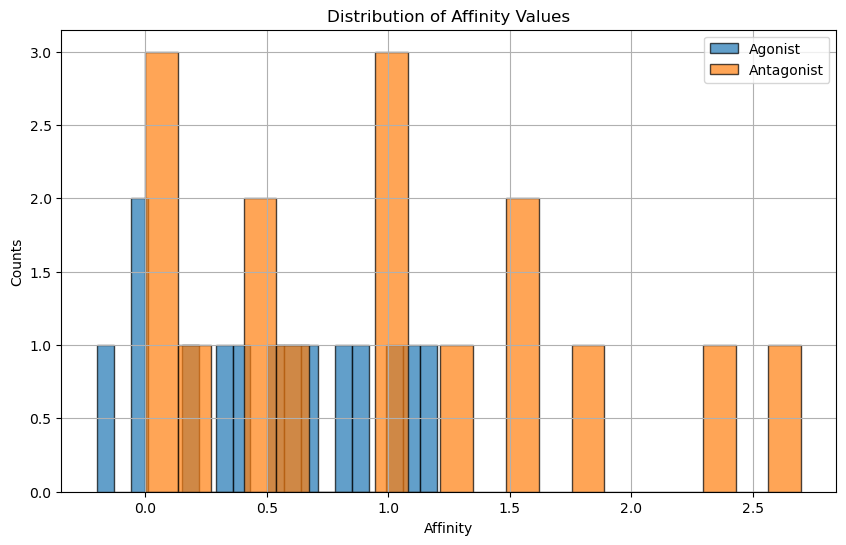

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_capz_f[df_capz_f['Bind_mode']=='1']['Capz-Apo'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(df_capz_f[df_capz_f['Bind_mode']=='-1']['Capz-Apo'], bins=20, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


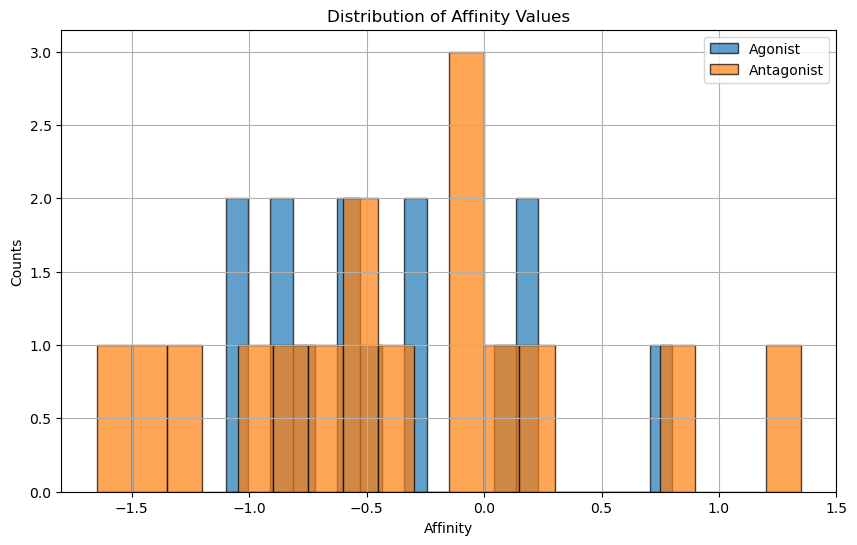

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_capz_f[df_capz_f['Bind_mode']=='1']['Cap-Capz'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(df_capz_f[df_capz_f['Bind_mode']=='-1']['Cap-Capz'], bins=20, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


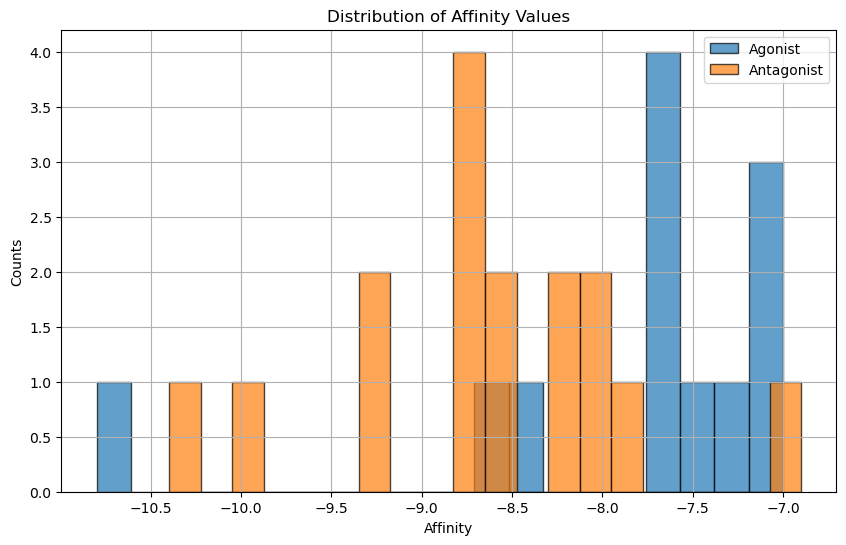

In [117]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_capz_f_7[df_capz_f_7['Bind_mode']=='1']['Capz_Affinity'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(df_capz_f_7[df_capz_f_7['Bind_mode']=='-1']['Capz_Affinity'], bins=20, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()

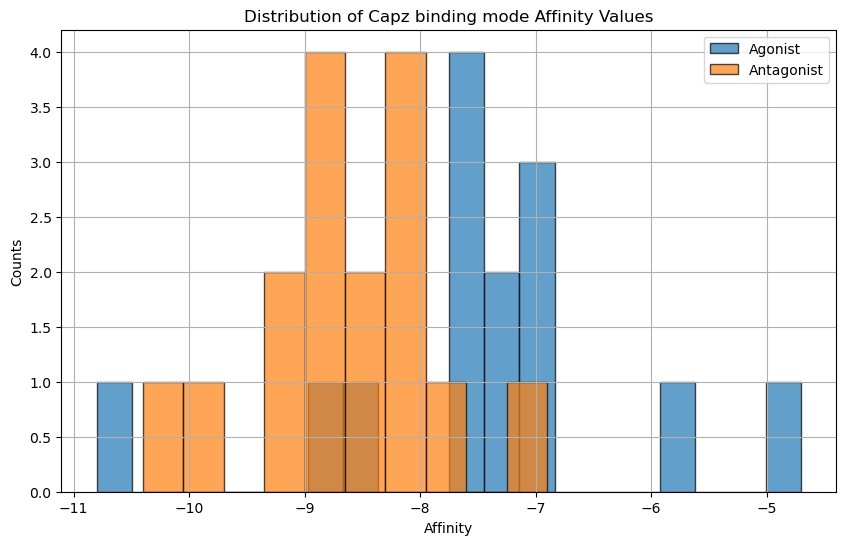

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_capz_f[df_capz_f['Bind_mode']=='1']['Capz_Affinity'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(df_capz_f[df_capz_f['Bind_mode']=='-1']['Capz_Affinity'], bins=10, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Capz binding mode Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


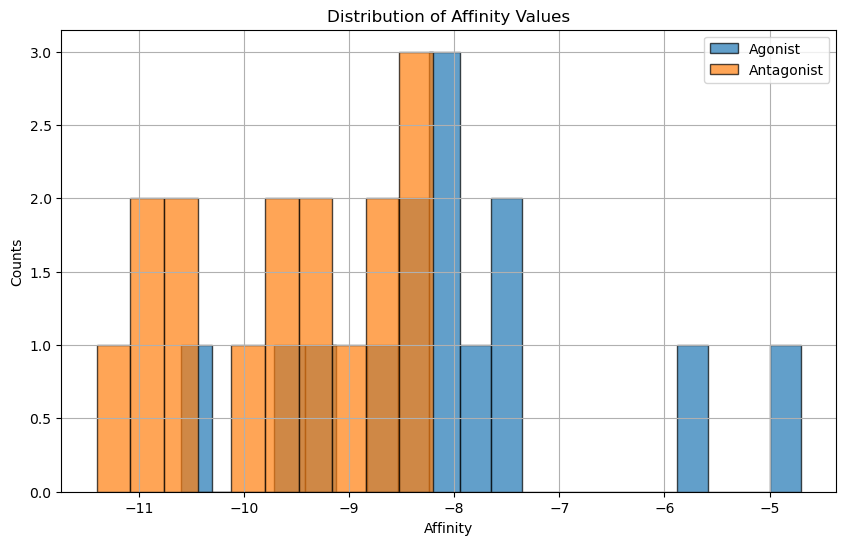

In [124]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_capz_f[df_capz_f['Bind_mode']=='1']['Affinity'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(df_capz_f[df_capz_f['Bind_mode']=='-1']['Affinity'], bins=10, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


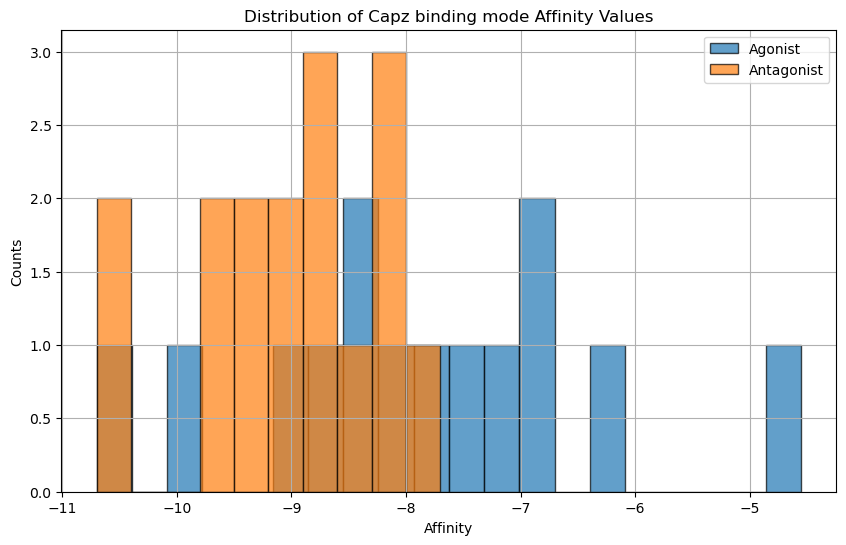

In [131]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(TRPV1_ago_anta[TRPV1_ago_anta['Bind_mode']=='1']['Avg_Cap_aff'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(TRPV1_ago_anta[TRPV1_ago_anta['Bind_mode']=='-1']['Avg_Cap_aff'], bins=10, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Capz binding mode Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


In [129]:
TRPV1_ago_anta

,INCI,R_Affinity,Cap_mode_Affinity,Diff,Bind_mode,INCI,Affinity,Apo-Cap,Avg_Cap_aff,Cap-Apo
25,NADA,-8.0,-8.3,-0.3,-1,NADA,-8.7,-0.55,-8.15,0.55
19,asivatrep,-8.7,-8.6,0.1,-1,asivatrep,-10.5,-1.85,-8.65,1.85
18,A-1165442,-8.3,-8.2,0.1,-1,A-1165442,-8.2,0.05,-8.25,-0.05
16,mavatrep,-10.7,-10.7,0.0,-1,mavatrep,-10.8,-0.10,-10.70,0.10
29,AZD1386,-8.8,-8.8,0.0,-1,AZD1386,-8.8,0.00,-8.80,0.00
13,SB452533,-8.4,-8.5,-0.1,-1,SB452533,-8.5,-0.05,-8.45,0.05
11,A778317,-9.1,-9.0,0.1,-1,A778317,-11.4,-2.35,-9.05,2.35
20,AMG628,-9.7,-9.2,0.5,-1,AMG628,-9.4,0.05,-9.45,-0.05
9,AMG517,-9.3,-9.3,0.0,-1,AMG517,-10.5,-1.20,-9.30,1.20
21,JYL1421,-8.1,-8.1,0.0,-1,JYL1421,-9.3,-1.20,-8.10,1.20


In [134]:
cap = TRPV1_ago_anta[['INCI','Avg_Cap_aff']]
cap.columns = ['INCI', 'INCI2', 'Avg_Cap_aff']
cap = cap.drop(columns=['INCI2'])
cap

,INCI,Avg_Cap_aff
25,NADA,-8.15
19,asivatrep,-8.65
18,A-1165442,-8.25
16,mavatrep,-10.70
29,AZD1386,-8.80
13,SB452533,-8.45
11,A778317,-9.05
20,AMG628,-9.45
9,AMG517,-9.30
21,JYL1421,-8.10


In [8]:
import dock
import time

receptor_dir = 'receptor'
r_receptor = os.path.join(receptor_dir, 'apo_8gfa_rigid.pdbqt')
f_receptor = os.path.join(receptor_dir, 'apo_8gfa_flex.pdbqt')
pdbqt_dir = 'IUPHAR/IUPHAR_dock/pdbqt'
output_dir = 'IUPHAR/IUPHAR_dock/res_flex_R557_E570/'
os.makedirs(output_dir, exist_ok=True)

total_start = time.time()
for dirpath, dirnames, filenames in os.walk(pdbqt_dir):
    for file in filenames:
        if file.endswith('.pdbqt'):
            start_time = time.time()
            dock.dock_ligand_flex(r_receptor, f_receptor, os.path.join(pdbqt_dir, file) , os.path.join(output_dir, f'f_docked_{file[:-6]}.pdbqt'))
            end_time = time.time()
            print(end_time - start_time)
total_end = time.time()
print(total_end - total_start)

Docked IUPHAR/IUPHAR_dock/pdbqt/agatoxin_489.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_flex_R557_E570/f_docked_agatoxin_489.pdbqt
134.642187833786
Docked IUPHAR/IUPHAR_dock/pdbqt/JNJ17203212.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_flex_R557_E570/f_docked_JNJ17203212.pdbqt
30.398862600326538
Docked IUPHAR/IUPHAR_dock/pdbqt/SB705498.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_flex_R557_E570/f_docked_SB705498.pdbqt
27.31958794593811
Docked IUPHAR/IUPHAR_dock/pdbqt/allicin.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_flex_R557_E570/f_docked_allicin.pdbqt
14.874513387680054
Docked IUPHAR/IUPHAR_dock/pdbqt/A778317.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_flex_R557_E570/f_docked_A778317.pdbqt
24.79203224182129
Docked IUPHAR/IUPHAR_dock/pdbqt/capsaicin.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_flex_R557_E570/f_docked_capsaicin.pdbqt
35.743802309036255
Docked IUPHAR/IUPHAR_dock/pdbqt/SB366791.pdbqt, output saved to IUPHAR/IUPHAR_dock/res_flex_R557_E570/f_docked_SB366791.pd

In [14]:
TRPV1_ago_anta

,INCI,R_Affinity,Cap_mode_Affinity,Diff,Bind_mode
25,NADA,-8.0,-8.3,-0.3,-1
19,asivatrep,-8.7,-8.6,0.1,-1
18,A-1165442,-8.3,-8.2,0.1,-1
16,mavatrep,-10.7,-10.7,0.0,-1
29,AZD1386,-8.8,-8.8,0.0,-1
13,SB452533,-8.4,-8.5,-0.1,-1
11,A778317,-9.1,-9.0,0.1,-1
20,AMG628,-9.7,-9.2,0.5,-1
9,AMG517,-9.3,-9.3,0.0,-1
21,JYL1421,-8.1,-8.1,0.0,-1


In [16]:
log_dir = './IUPHAR/IUPHAR_dock/res_flex_R557_E570//'
df_flex = process_log_files(log_dir)
df_flex['INCI'] = df_flex['INCI'].str.replace('f_docked_','')
df_flex.columns = ['INCI','Flex_affinity']
df_flex = pd.merge(TRPV1_ago_anta, df_flex, on="INCI", how='inner')
df_flex

,INCI,R_Affinity,Cap_mode_Affinity,Diff,Bind_mode,Flex_affinity
0,NADA,-8.0,-8.3,-0.3,-1,-9.7
1,asivatrep,-8.7,-8.6,0.1,-1,-10.8
2,A-1165442,-8.3,-8.2,0.1,-1,-8.3
3,mavatrep,-10.7,-10.7,0.0,-1,-11.4
4,AZD1386,-8.8,-8.8,0.0,-1,-10.8
5,SB452533,-8.4,-8.5,-0.1,-1,-8.6
6,A778317,-9.1,-9.0,0.1,-1,-11.5
7,AMG628,-9.7,-9.2,0.5,-1,-10.7
8,AMG517,-9.3,-9.3,0.0,-1,-11.3
9,JYL1421,-8.1,-8.1,0.0,-1,-9.9


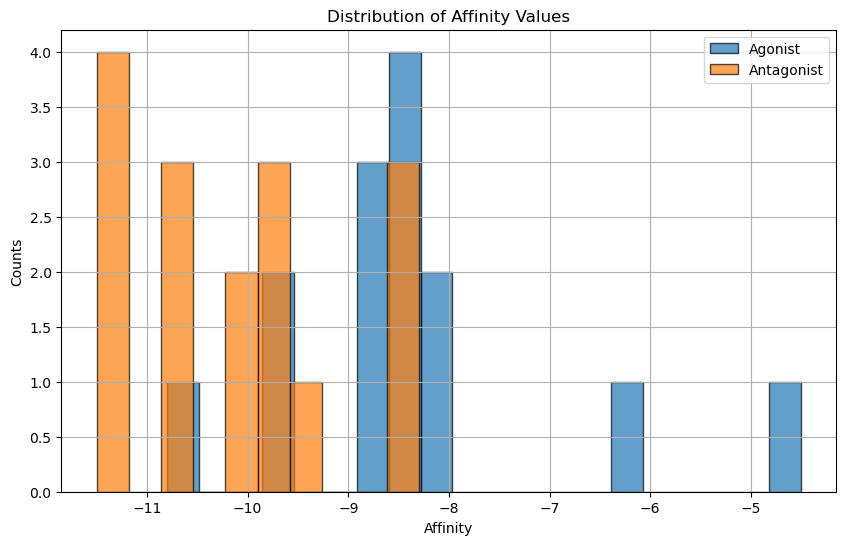

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df_flex[df_flex['Bind_mode']=='1']['Flex_affinity'], bins=20, edgecolor='k', alpha=0.7, label='Agonist')
plt.hist(df_flex[df_flex['Bind_mode']=='-1']['Flex_affinity'], bins=10, edgecolor='k', alpha=0.7, label='Antagonist')
plt.title('Distribution of Affinity Values')
plt.xlabel('Affinity')
plt.ylabel('Counts')
plt.grid(True)
plt.legend()
plt.show()


In [5]:
import os
from Bio.PDB import PDBParser
import subprocess

def pdbqt_to_pdb(pdbqt_file, pdb_file):
    command = f"obabel {pdbqt_file} -O {pdb_file}"
    subprocess.run(command, shell=True, check=True)

def calculate_distance(pdb_file, chain_id, res1, res2):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure('protein', pdb_file)
    model = structure[0]  # Assuming the first model if multiple models are present

    chain = model[chain_id]
    atom1 = chain[res1]['CA']  # Getting the alpha carbon atom
    atom2 = chain[res2]['CA']  # Getting the alpha carbon atom

    return atom1 - atom2

def cal_dist_R557_E570(pdbqt_file_path):
    # Paths to the input and output files
    # pdb_file_path = 'receptor/apo_8gfa.pdb'
    pdb_file_path = pdbqt_file_path.replace('.pdbqt', '.pdb')

    # Convert PDBQT to PDB
    pdbqt_to_pdb(pdbqt_file_path, pdb_file_path)
    
    # Calculate the distance
    chain_id = 'D'
    residue1 = 557
    residue2 = 570
    
    distance = calculate_distance(os.path.join(os.getcwd(),pdb_file_path), chain_id, residue1, residue2)
    return distance

cal_dist_R557_E570('receptor/apo_8gfa.pdbqt')

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders (title is receptor/apo_8gfa.pdbqt)

1 molecule converted


12.734871

In [7]:
cal_dist_R557_E570('IUPHAR/IUPHAR_dock/res_capz_mode/capz_docked_zucapsaicin.pdbqt')

9 molecules converted


KeyError: 'D'

In [21]:
import os
import dock

lig_dir = 'DP/pdb/'
output_dir = 'DP/pdbqt'
os.makedirs(output_dir, exist_ok=True)
for dirpath, dirnames, filenames in os.walk(lig_dir):
    for file in filenames:
        if file.endswith('.pdb'):
            dock.prepare_pdbqt(os.path.join(os.getcwd(), lig_dir, file), output_dir)

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/DP/pdb/serinylphosphoserine.pdb to DP/pdbqt/serinylphosphoserine.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/DP/pdb/phosphotyrosinylphosphotyrosine.pdb to DP/pdbqt/phosphotyrosinylphosphotyrosine.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/DP/pdb/glutaminylselenocysteine.pdb to DP/pdbqt/glutaminylselenocysteine.pdbqt
Standard Output:
Sorry, there are no Gasteiger parameters available for atom glutaminylselenocysteine: :   1:Se

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/DP/pdb/histidinylarginine.pdb to DP/pdbqt/histidinylarginine.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/DP/pdb/valinylmethionine.pdb to DP/pdbqt/valinylmethionine.pdbqt
Standard Output:

Processed /home/kjs/Downloads/AutoDockTools_py3/pycode/DP/pdb/tyrosinylornithine.pdb to DP/pdbqt/tyrosinylornithine.pdbqt
Standard Output:

Processed /home/kjs/Downl